In [28]:
import jaccard_similiarity
domain = "../dataset_basket_pulito_allineato"
site_a = "NBA_pages"
site_b = "REALGM_pages"

scores = []
page_to_link = 2
total_pages = 502
while ( page_to_link <= total_pages ):
    scores.append(jaccard_similiarity.entity_linkage(domain, site_a, site_b, page_to_link))
    page_to_link += 100
    
print("Done!")

Number of pages:  2
Number of pages:  52
Number of pages:  102
Number of pages:  152
Number of pages:  202
Number of pages:  252
Number of pages:  302
Number of pages:  352
Number of pages:  402
Number of pages:  452
Number of pages:  502
Done!


In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
import numpy as np

def normalize_feature(feature, max_samples, value_repeat=None):
    last_feature = len(feature) - 1
    while last_feature < max_samples:
        if value_repeat == None:
            repeated_feature = feature[last_feature]
        else:
            repeated_feature = value_repeat
        feature.append(repeated_feature)
        last_feature += 1

def normalize_samples(scores, max_samples):
    normalized_scores = scores.copy()
    for precisions, recalls in normalized_scores:
        normalize_feature(precisions, max_samples)
        normalize_feature(recalls, max_samples, 1.0)
    return normalized_scores

def average_score(scores):
    precisions = map(lambda score: np.array(score[0]), scores)
    recalls = map(lambda score: np.array(score[1]), scores)
    
    average_precision = sum(precisions) / len(scores)
    average_recall = sum(recalls) / len(scores)
    return average_precision, average_recall

        

def plot_recall_precision(recall, precision):
    plt.plot(recall, precision)
    plt.axis([0, 1.05, 0, 1.05])

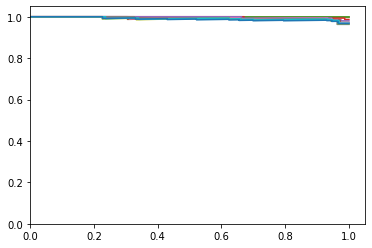

In [31]:
for precision, recall in normalize_samples(scores, page_to_link):
    plot_recall_precision(recall, precision)
    
plt.show()

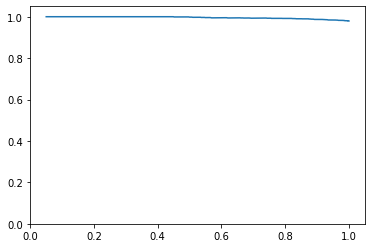

In [32]:
average_precision, average_recall = average_score(normalize_samples(scores, page_to_link))
plot_recall_precision(average_recall, average_precision)